<div style="padding: 20px; 
            color: #000000;
            margin: 10px;
            font-size:220%;
            text-align:center;
            display: fill;
            border-radius: 20px;
            border-width: 5px;
            border-style: solid;
            border-color: #c1083f;
            background-color:#e9ba5f;
            overflow:hidden;
            font-weight:500">Employee Attrition Rate - EDA and ML model</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#c1083f; overflow: hidden;">EDA</div>

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Read the data</div>

In [2]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; First look</div>

In [3]:
display(df.head())

print('\n')

display(df.tail())

print(f'\nDATAFRAME SHAPE: {df.shape[0]} x {df.shape[1]}')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2



DATAFRAME SHAPE: 1470 x 35


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Missing values</div>

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<div class="alert alert-block alert-info" style="color: #000000;">
There are no missing values in the dataset.
</div>

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Target variable</div>

In [7]:
target = 'Attrition'

In [8]:
(df[target].value_counts() / len(df)).round(2)

No     0.84
Yes    0.16
Name: Attrition, dtype: float64

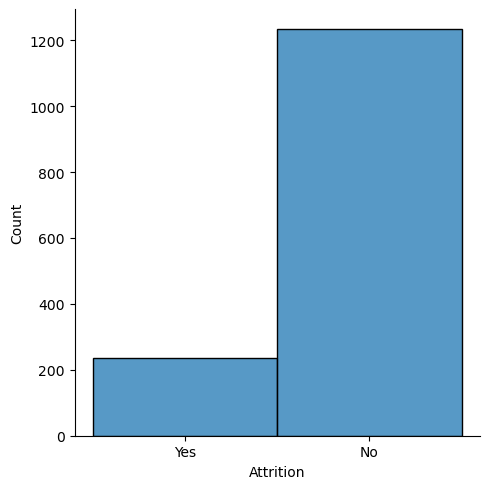

In [9]:
sns.displot(data=df, x=target)

<div class="alert alert-block alert-info" style="color: #000000;">
&#128172; The target variable is imbalanced. 16% of the employees left the firm.<BR>
That's actually not so good for the company, as I learnt. It is a value that should alarm HR team to think about ways to make more employees stay.<BR>
    Anyway, the imbalance is a really important point for us to notice, as it will have a big impact on metrics for our model.
</div>

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Unique features</div>

In [10]:
features = df.drop(target, axis=1).columns.to_list()

# code modified from https://www.kaggle.com/code/martynovandrey/ps-3-3-fast-eda @Martynov Andrey - highly recommend the notebook! 

uniques = []
for f in features:
    item = {'feature':f}
    count = len(df[f].unique())
    item['unique'] = count
    if count < 10:
        item['values'] = df[f].unique().tolist()
    elif count < df.shape[0]:
        item['values'] = df[f].unique().tolist()[:10] + ['...']
    else:
        item['values'] = ['All values are unique']
    uniques.append(item)
df_uniques = pd.DataFrame(uniques)
df_uniques = df_uniques.set_index('feature')

df_uniques.style.background_gradient(subset=['unique'], cmap='Reds')

,unique,values
feature,,
Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, '...']"
BusinessTravel,3,"['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']"
DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358, 216, 1299, '...']"
Department,3,"['Sales', 'Research & Development', 'Human Resources']"
DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, '...']"
Education,5,"[2, 1, 4, 3, 5]"
EducationField,6,"['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']"
EmployeeCount,1,[1]
EmployeeNumber,1470,['All values are unique']


<div class="alert alert-block alert-info" style="color: #000000;">&#128172; Above table shows us that:<BR>
    a) EmployeeNumber contains all unique values so it is an id-type feature which can be safely dropped as it doesn't provide any important info for us;<BR>
    b) EmployeeCount, Over18 and StandardHours are constant so they don't give us any information as well.<BR><BR>
    So mentioned columns will be dropped.
                                                                                                                            
</div>

In [11]:
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Separate categorical and numerical data</div>

In [13]:
features = df.drop(target, axis=1).columns.to_list()
features

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [14]:
# separate categorical and numerical data

numerical_feat = [col for col in df.select_dtypes('int64').columns if col in features]
categorical_feat = [col for col in df.select_dtypes('object').columns if col in features]

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Numerical data distribution</div>

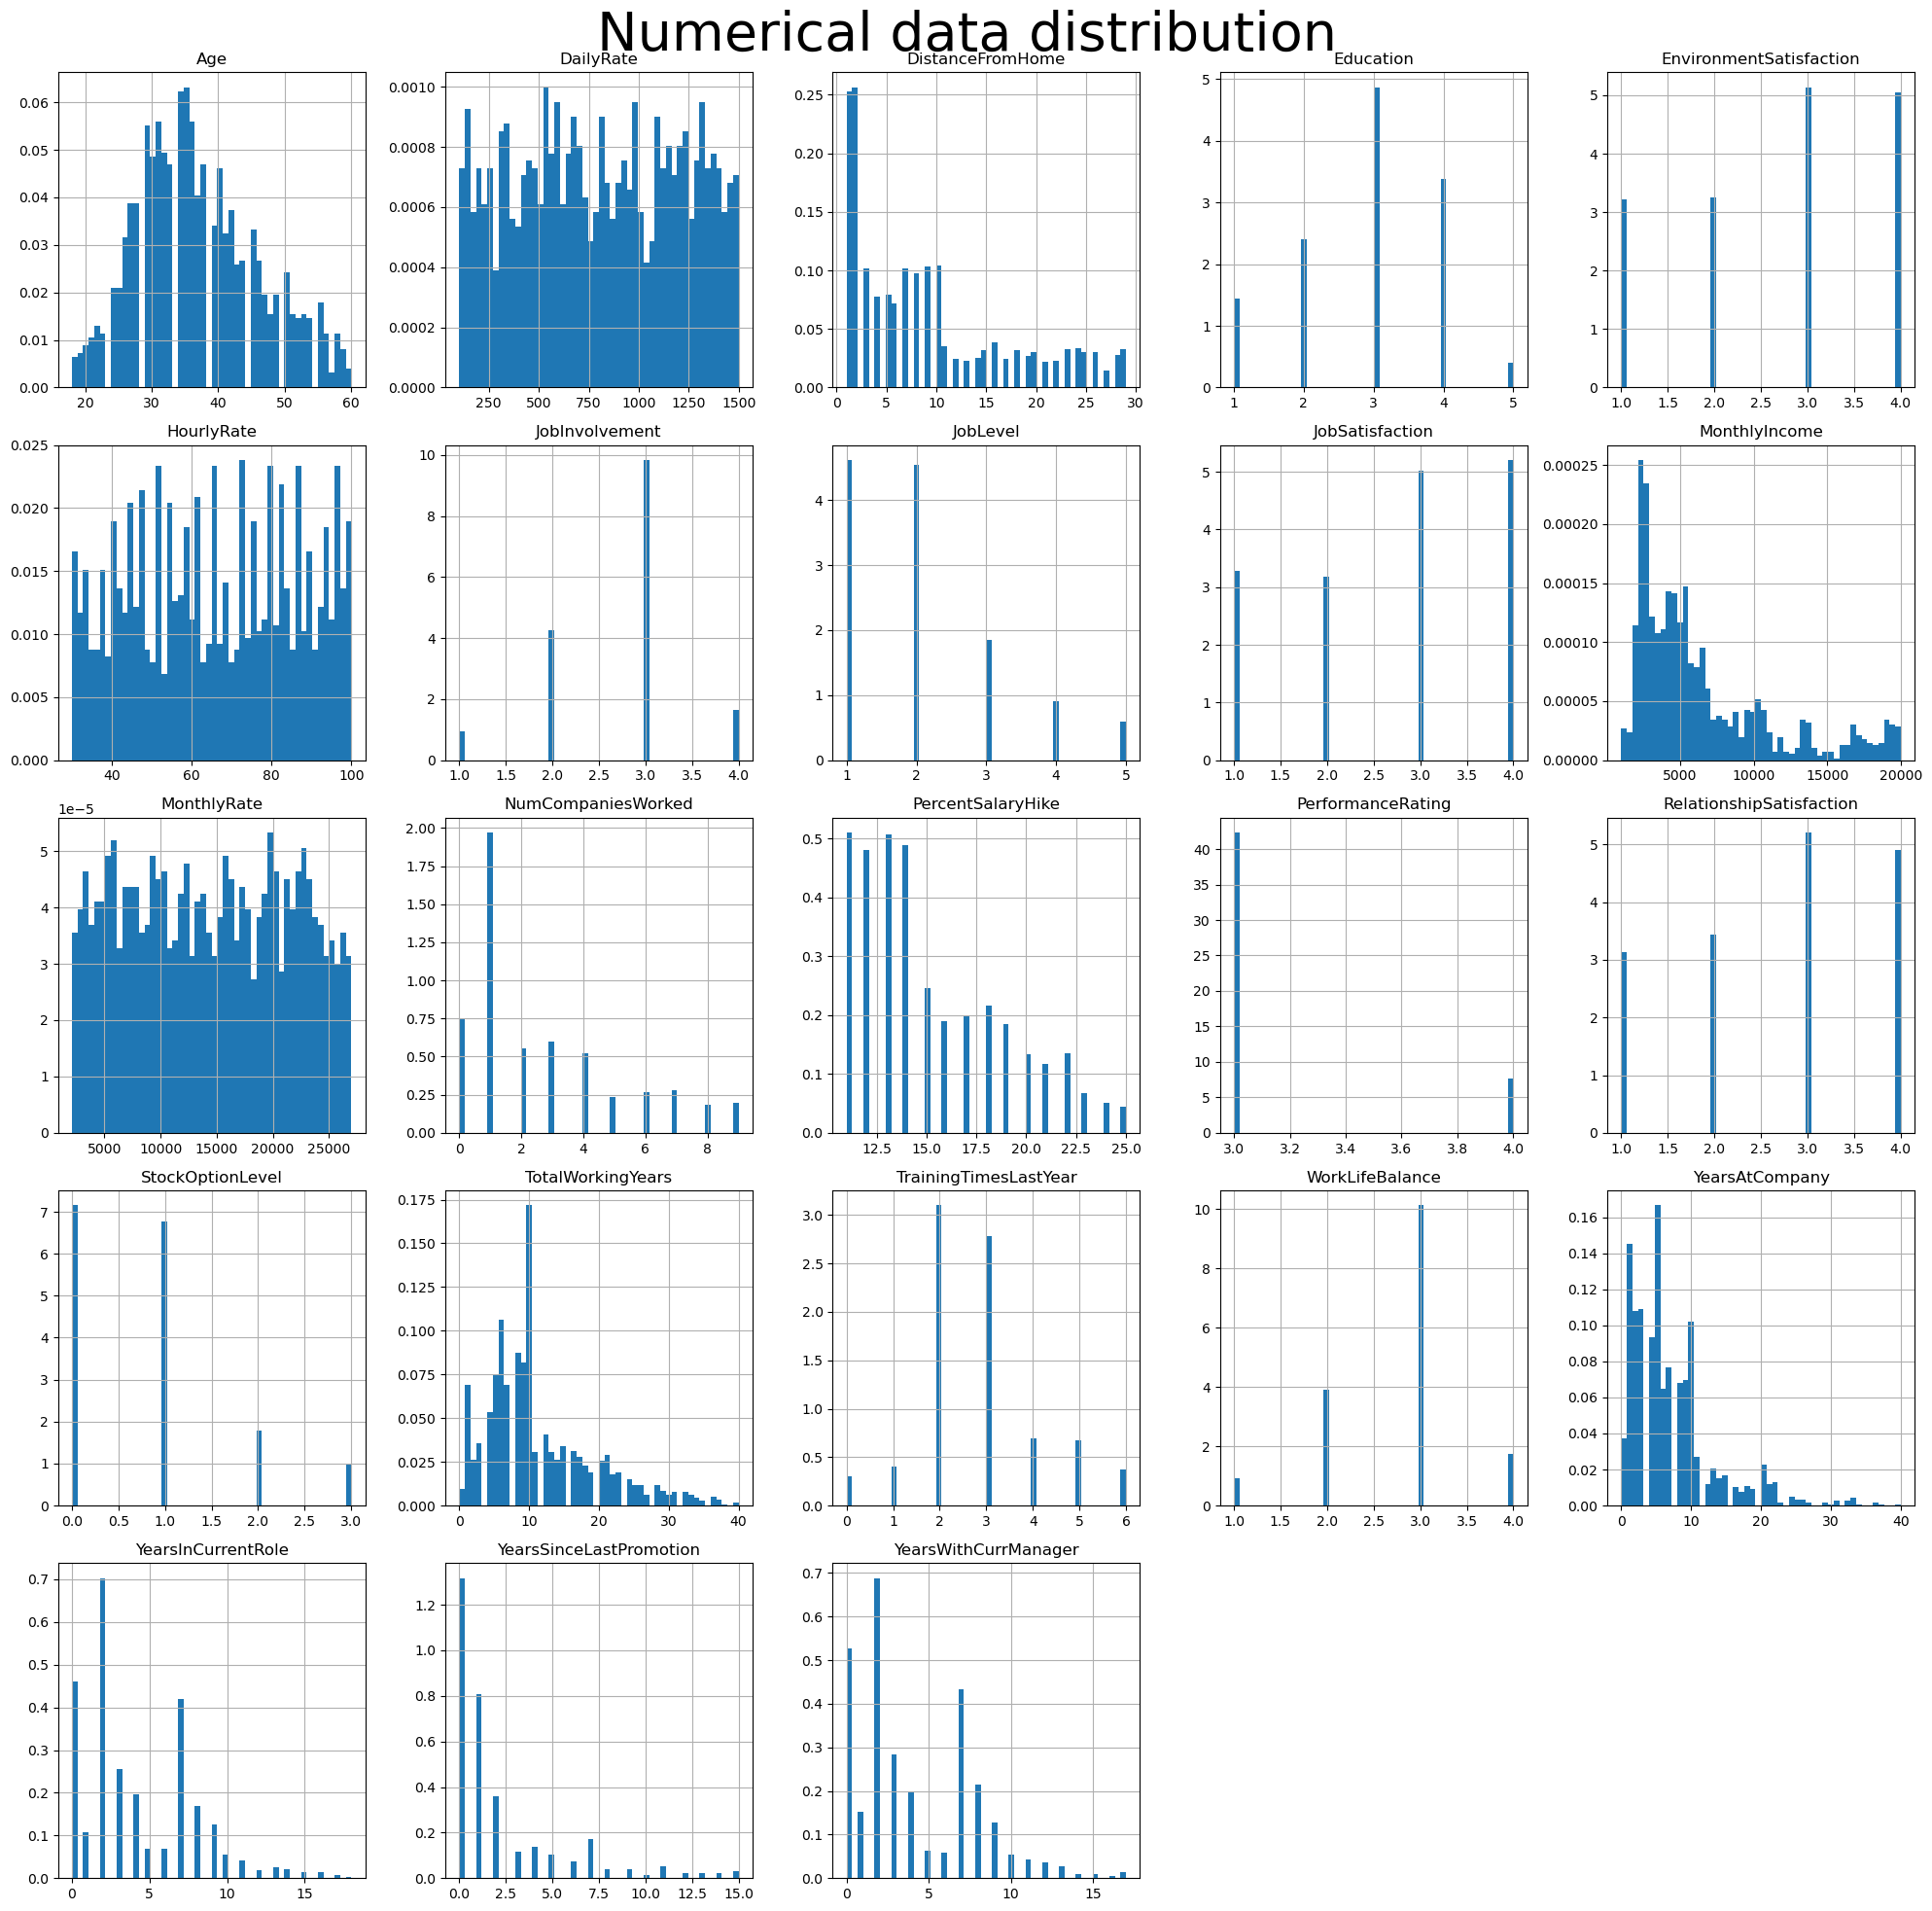

In [15]:
df[numerical_feat].hist(figsize=(20, 20), density=True, bins=50)
plt.suptitle('Numerical data distribution', fontsize=40)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="color: #000000;">&#128172; Some quick conclusions:<BR>
    <ul>
    <li> Most employees are of age 30-40.
    <li> Majority of people live near the workplace. I wonder how this impacts the attrition rate.
    <li> Majority of people have job level 1 and 2, which I assume means there are many entry-level and junior positions. This corresponds with YearsInCurrentRole and YearsAtCompany.
    <li> MonthlyIncome's distribution is right-skewed. Well, most of them are but I bet this one has a massive impact on attrition rate.</ul>
    Lots of information should be given when we compare numerical values to the target.</div>

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Numerical data vs the target</div>

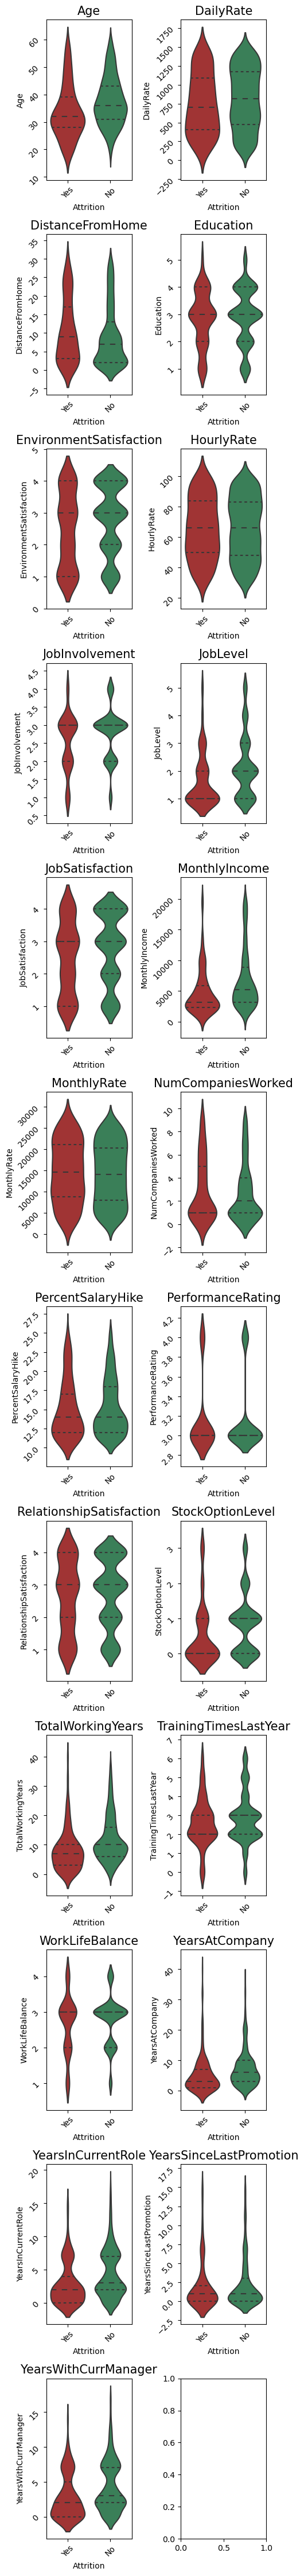

In [16]:
my_palette = {'Yes': 'firebrick', 'No': 'seagreen'}

fig , ax = plt.subplots(12, 2, figsize=(5, 45))
total = len(df)
ax =  np.ravel(ax)

for i, col in enumerate(numerical_feat):
    sns.violinplot(ax=ax[i], y=df[col], x=df['Attrition'], inner='quartile', palette=my_palette)
    ax[i].tick_params(labelrotation=45)
    ax[i].set_title(f"{col}", fontsize=15)
    ax[i].set(xlabel='Attrition')
  
fig.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="color: #000000;">&#128172; Observations:<BR>
    <ul>
    <li> Features that have no meaningful differences when comparing their relation to target variable: Education, HourlyRate, MonthlyRate, PercentSalaryHike, RelationshipSatisfation.
    <li> Features that have very little differences when comparing their relation to target variable: JobInvolvement, PerformanceRating, WorkLifeBalance, YearsSinceLastPromotion.</ul>
    &#128172; Features that have most meaningful differences and give us best insights:
    <ul>
    <li> <b>Age</b> - Employees who left the firm are younger that those who stayed.
    <li> <b>DailyRate</b> - There is a small difference between those who left and those who stayed but in general, employees who left the firm had lower DailyRate.
    <li> <b>DistanceFromHome</b> - People who left have larger DistanceFromHome.
    <li> <b>JobLevel</b> - Majority of employees leaving the firm has the lowest JobLevel.
    <li> <b>JobSatisfaction</b> - the means are the same but people who left have more JobSatisfaction = 1.
    <li> <b>MonthlyIncome</b> - people who left had lower MonthlyIncome.
    <li> <b>NumCompaniesWorked</b> - on average, people who left the company, didn't have many previous experience or it was their first job.
    <li> <b>StockOptionLevel</b> - Employees who left usually had 0 StockOptionLevel.
    <li> <b>TotalWorkingYears</b> - the difference is small, but on average, employees who left, worked for a shorter amount of time.
    <li> <b>TrainingTimesLastYear</b> - the difference is quite large and tells us that the more trainings employee has, the bigger the chance of them staying in the company.
    <li> <b>YearsAtCompany</b> - on average, employees who left worked for a shorter amount of time in this company.
    <li> <b>YearsInCurrentRole</b> - on average, people leave while they don't have seniority in the current role.
    <li> <b>YearsWithCurrManager</b> - similarly to above point, on average people leave while they are new in the role under a given manager.
    </ul>
    
</div>

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Categorical data vs the target</div>

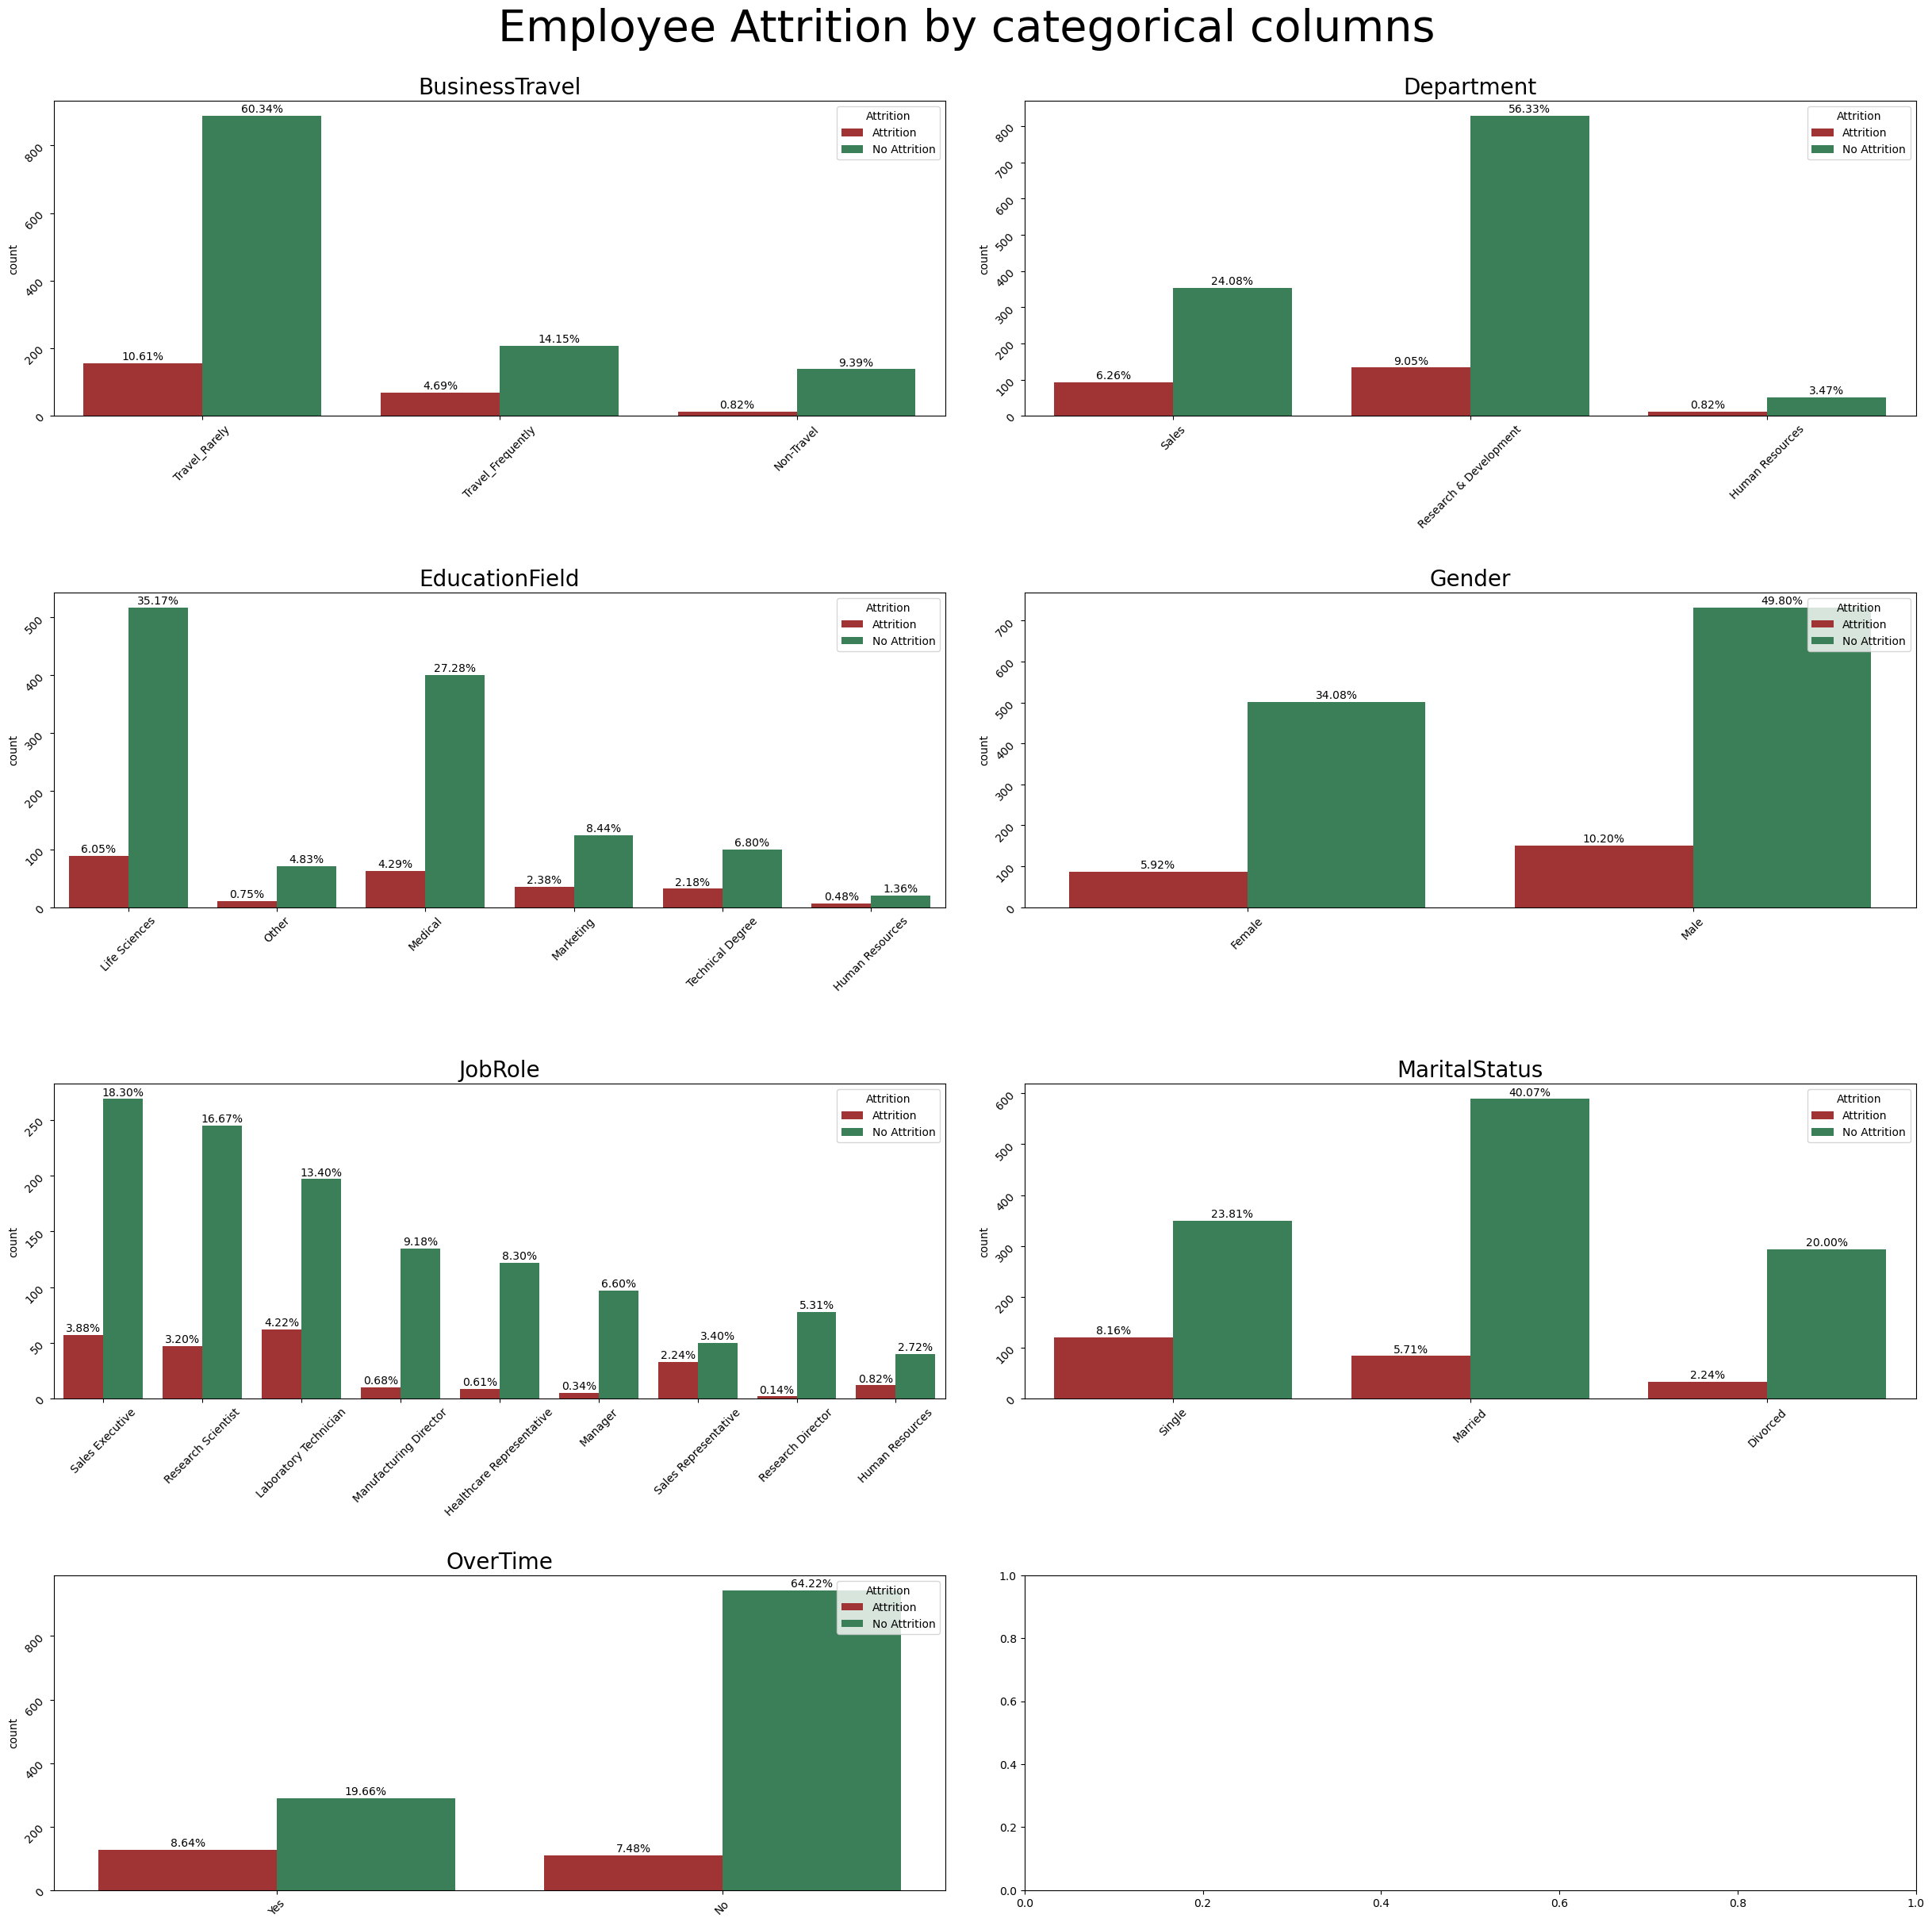

In [17]:
fig , ax = plt.subplots(4,2,figsize=(25,25))
total = len(df)
ax =  np.ravel(ax)

for i, col in enumerate(categorical_feat):
    sns.countplot(ax=ax[i], x=df[col], hue=df['Attrition'], palette=my_palette)
    ax[i].tick_params(labelrotation=45)
    ax[i].set_title(f"{col}",fontsize=20)
    ax[i].legend(title='Attrition', loc='upper right', labels=['Attrition', 'No Attrition'])
    ax[i].set(xlabel=None)
  
    for p in ax[i].patches:
        percentage = f'{100*p.get_height()/total:.2f}%\n'
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax[i].annotate(percentage, (x,y), ha='center', va='center')


fig.suptitle("Employee Attrition by categorical columns",fontsize = 40)
fig.tight_layout(pad = 3)
plt.show()

<div class="alert alert-block alert-info" style="color: #000000;">Observations from categorical data:<BR>
    <ul>
    <li> Employees who travelled rarely are more likely to leave the company than employees who travelled frequently or hadn't travel at all (interesting!).
    <li> Among 3 departments, Research & Development has the biggest attrition rate.
    <li> Among education fields, two biggest attrition rates are for Life Sciences and Medical.
    <li> When we look at the gender, Male employees are slighlty more likely to leave the company.
    <li> Top 3 attrition rates among Job Roles are: Sales Executive, Research Scientist, Laboratory Technician.
    <li> There is almost no difference in likelihood of leaving the company if you are single or divorced, but it is most likely to happen if you are married.
    <li> People are more likely to leave the company if they hadn't worked overtime (interesting!).
                                                                                                                            
</div>

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#c1083f; overflow: hidden;">Feature Engineering</div>

<div class="alert alert-block alert-info" style="color: #000000;">Taking into consideration all of my above observation, I can create some additional features.<br>
There is a nice code from <a href="https://www.kaggle.com/competitions/playground-series-s3e3/discussion/380920">Bill Cruise</a> that I will use here.
</div>

In [18]:
df['MonthlyIncome/Age'] = df['MonthlyIncome'] / df['Age']

df["Age_risk"] = (df["Age"] < 34).astype(int)
df["DailyRate_risk"] = (df["DailyRate"] < 700).astype(int)  # changed from HourlyRate
df["Distance_risk"] = (df["DistanceFromHome"] >= 20).astype(int)
df["YearsAtCo_risk"] = (df["YearsAtCompany"] < 4).astype(int)

df['NumCompaniesWorked'] = df['NumCompaniesWorked'].replace(0, 1)
df['AverageTenure'] = df["TotalWorkingYears"] / df["NumCompaniesWorked"]

df['JobHopper'] = ((df["NumCompaniesWorked"] > 2) & (df["AverageTenure"] < 2.0)).astype(int)

df["AttritionRisk"] = df["Age_risk"] + df["DailyRate_risk"] + df["Distance_risk"] + df["YearsAtCo_risk"] + df['JobHopper']

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Encoding categorical features</div>

In [19]:
categorical_feat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [20]:
df[categorical_feat]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


<div class="alert alert-block alert-info" style="color: #000000;">I will one-hot encode these categorical features: Department, EducationField, Gender, JobRole and Marital Status.    

As for the OverTime and BusinessTravel - these will be encoded by OrdinalEncoder.
    
And let's not forget about target Attrition - also using OrdinalEncoder.</div>

In [21]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False).fit(df[['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']])

encoded = enc.transform(df[['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']])

encoded_df = pd.DataFrame(encoded, columns = enc.get_feature_names_out())

encoded_df.head()

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
df = df.join(encoded_df)

In [23]:
df.drop(['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], axis=1, inplace=True)

In [24]:

# for BusinessTravel
maplist = [{'col': 'BusinessTravel', 'mapping': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}}]
oe = OrdinalEncoder(mapping=maplist)
df['BusinessTravel'] = oe.fit_transform(df['BusinessTravel'])

# for Attrition and OverTime
maplist = [{'col': 'OverTime', 'mapping': {'No': 0, 'Yes': 1}}]
oe = OrdinalEncoder(mapping=maplist)
df['OverTime'] = oe.fit_transform(df['OverTime'])

maplist = [{'col': 'Attrition', 'mapping': {'No': 0, 'Yes': 1}}]
oe = OrdinalEncoder(mapping=maplist)
df['Attrition'] = oe.fit_transform(df['Attrition'])

In [25]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1465,36,0,2,884,23,2,3,41,4,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,1,613,6,1,4,42,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,1,155,4,3,2,87,4,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,2,1023,2,3,4,63,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1469,34,0,1,628,8,3,2,82,4,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#c1083f; overflow: hidden;">EDA, again</div>

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Correlation with target</div>

In [26]:
correlations=df.corr()
correlations

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.159205,-0.011807,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185
Attrition,-0.159205,1.000000,0.127006,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,...,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,-0.009696,-0.008670,-0.011310,-0.004164,0.029300,-0.011696,...,0.002094,-0.039312,0.014893,-0.005138,0.002477,-0.025131,0.059995,-0.028444,0.002198,0.023017
DailyRate,0.010661,-0.056652,-0.015539,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,...,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,...,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445
Education,0.208034,-0.031373,-0.008670,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168
EnvironmentSatisfaction,0.010146,-0.103369,-0.011310,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,...,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035
HourlyRate,0.024287,-0.006846,-0.004164,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,...,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436
JobInvolvement,0.029820,-0.130016,0.029300,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,...,-0.022724,0.017112,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.016815,0.028324,-0.045253
JobLevel,0.509604,-0.169105,-0.011696,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,...,-0.344608,0.552744,0.114896,0.414319,-0.387788,0.127490,-0.216559,0.037087,0.050547,-0.087072


<div class="alert alert-block alert-info" style="color: #000000;">Whoah, I made so many features, the correlation table (and plot as well) is unreadable. Maybe this will help:</div>

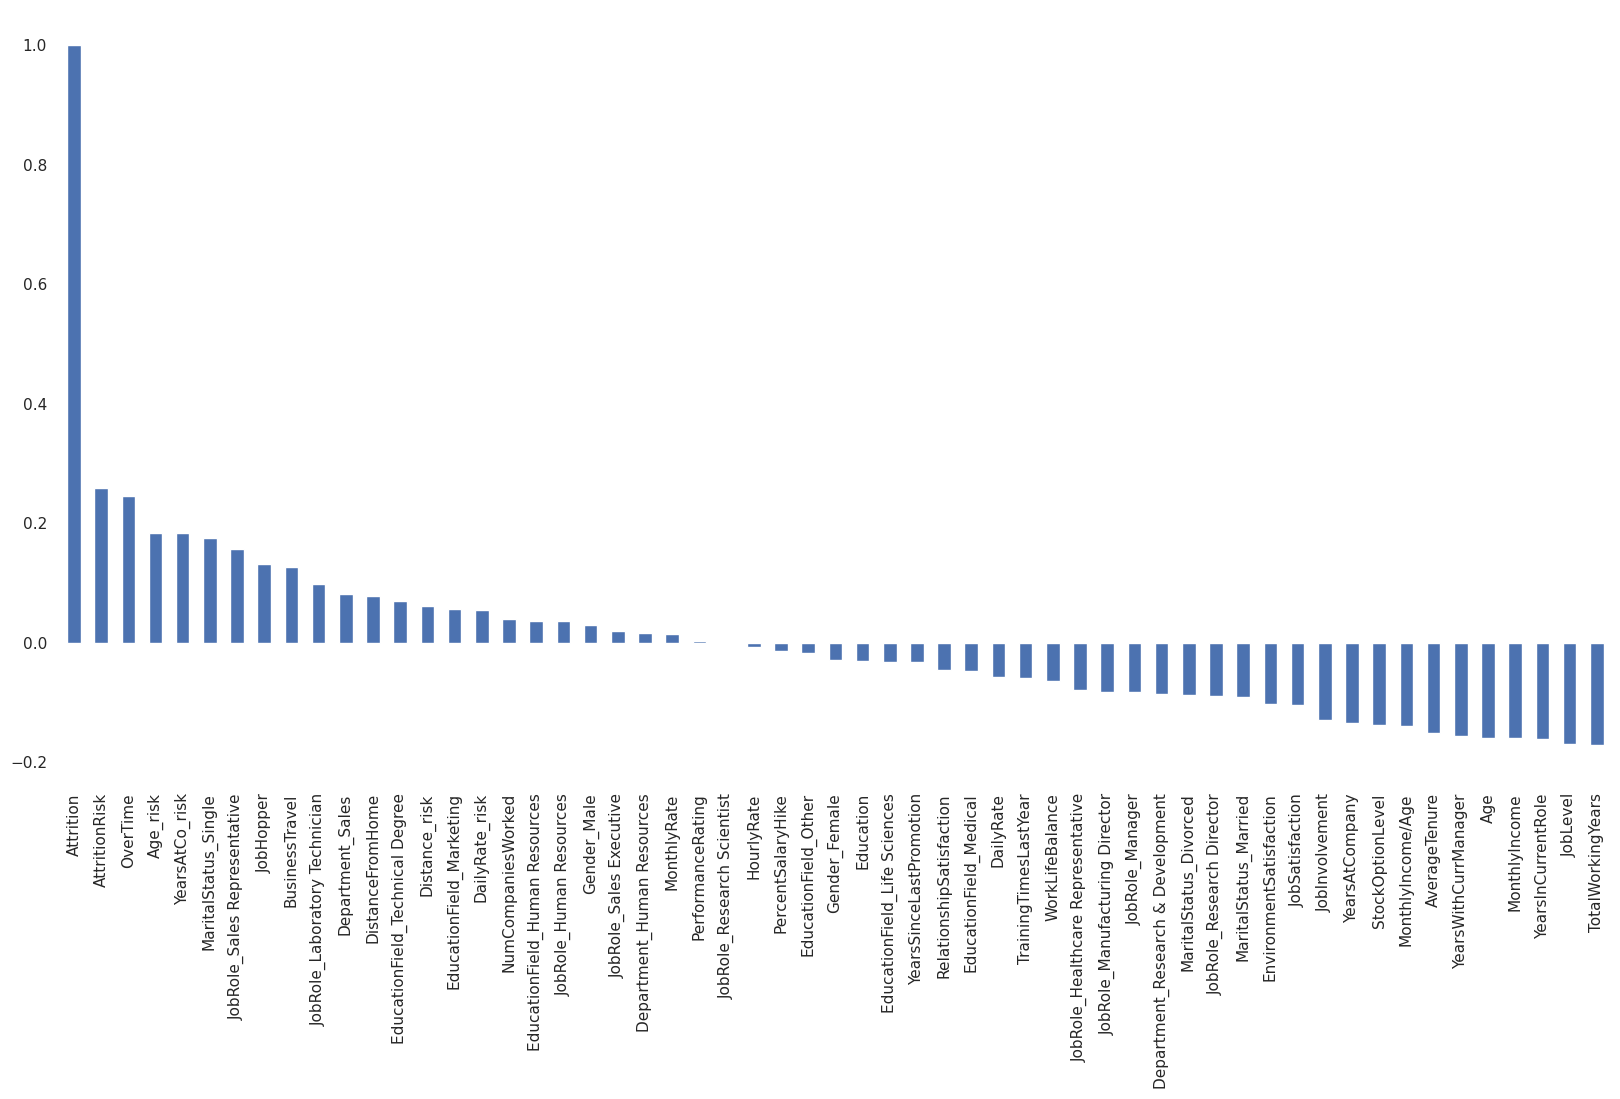

In [27]:
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
plt.figure(figsize=(20,10))
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

<div class="alert alert-block alert-info" style="color: #000000;">It's nice to see that some features I marked as unimportant here are also deemed irrelevant, like PerformanceRating and PercentSalaryHike.

It's also nice to see created features have high correlation with the target.</div>

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Correlations between independent variables</div>

<div class="alert alert-block alert-info" style="color: #000000;">From <a href="https://www.kaggle.com/code/nguyenthicamlai/employee-attrition-and-factory-eda-models">Nguyen Thi Cam Lai</a> I learned:
    <ul>
        <li> The higher the correlation between the two independent variables, the more similar information they bring to the context of the problem.
    <li> Therefore, when two independent variables have high correlation, one can be selected to apply to model training.</ul>

I will use code from cited notebook to check correlations between independent variables.

</div>
    
    

In [28]:
threshold=0.7
cols = list(correlations.columns)
cols_at_index = list(correlations.index)
feature1, feature2, correlation = [], [], []
for i in range(len(cols)):
    for j in range(len(correlations)):
        if correlations[cols[i]][j] >= threshold and correlations[cols[i]][j] < 1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(correlations[cols[i]][j])

new_df = pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
new_df

,feature1,feature2,correlation
0,DistanceFromHome,Distance_risk,0.812433
1,JobLevel,MonthlyIncome,0.950300
2,JobLevel,TotalWorkingYears,0.782208
3,JobLevel,MonthlyIncome/Age,0.877710
4,MonthlyIncome,TotalWorkingYears,0.772893
5,MonthlyIncome,MonthlyIncome/Age,0.932472
6,PercentSalaryHike,PerformanceRating,0.773550
7,YearsAtCompany,YearsInCurrentRole,0.758754
8,YearsAtCompany,YearsWithCurrManager,0.769212
9,YearsAtCompany,AverageTenure,0.777699


In [29]:
# let's drop some irrelevant data
df_copy = df.copy()

# dropping columns that are not correlated with the target
df_copy.drop(['MonthlyRate', 'PerformanceRating', 'JobRole_Research Scientist', 'HourlyRate', 'PercentSalaryHike', 'EducationField_Other'], axis=1, inplace=True)

# dropping YearsInCurrentRole and YearsWithCurrManager as they are strongly correlated with YearsAtCompany
df_copy.drop(['YearsInCurrentRole', 'YearsWithCurrManager'], axis=1, inplace=True)

# dropping JobRole_Human Resources to leave Department_Human Resources
# and JobRole_Sales Executive to leave Department_Sales
df_copy.drop(['JobRole_Human Resources', 'JobRole_Sales Executive'], axis=1, inplace=True)

In [30]:
df_copy

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,...,Gender_Male,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,2,3,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,49,0,2,279,8,1,3,2,2,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1,1373,2,2,4,2,1,3,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,2,1392,3,4,4,3,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,0,1,591,2,1,1,3,1,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2,3,4,2,4,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,1,613,6,1,4,2,3,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,1,155,4,3,2,4,2,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,2,1023,2,3,4,2,2,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#c1083f; overflow: hidden;">Data preprocessing</div>

In [31]:
y = df_copy['Attrition'].values
X = df_copy.drop(['Attrition'], axis=1)

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Address the imbalance in data</div>

<div class="alert alert-block alert-info" style="color: #000000;">As I mentioned earlier, the target data is imbalanced, giving us 16% of employees who left the company versus 84% who stayed. This by itself can create bias in our models and show high accuracy while majority of of the less represented class will be predicted wrongly.<BR><BR>
    One way of dealing with this issue is to either oversample or undersample the dataset. I will go with oversampling, because even though we have lots of features, we have only 1470 samples, so enlarging that shouldn't make any problem.

</div>
    
    

In [32]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)

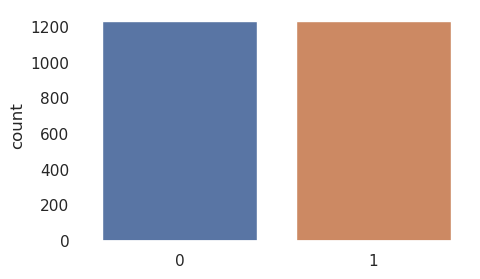

In [33]:
plt.subplots(figsize=(5,3))
sns.countplot(x=y);

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Train-Test split</div>

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=13)

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#c1083f; overflow: hidden;">Modeling</div>

In [35]:
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; CrossValidation</div>

In [36]:
%%time

CV_FLAG = True

if CV_FLAG:

    from sklearn.model_selection import cross_val_score, KFold

    kf = KFold(n_splits=6, shuffle=True, random_state=13)
    results = {'model': [], 'f1': []}
    for classifier in [BaggingClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(),
                   RandomForestClassifier(), HistGradientBoostingClassifier(), AdaBoostClassifier(),
                   LogisticRegression(solver='liblinear'), RidgeClassifier()]:
        model = classifier
        cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring="f1")
        results['model'].append(model.__class__.__name__)
        results['f1'].append(np.mean(cv_results))
    display(pd.DataFrame(results).sort_values('f1', ascending=False))

,model,f1
1,ExtraTreesClassifier,0.913951
2,GradientBoostingClassifier,0.910428
4,HistGradientBoostingClassifier,0.907610
3,RandomForestClassifier,0.894707
5,AdaBoostClassifier,0.887436
7,RidgeClassifier,0.845549
0,BaggingClassifier,0.845151
6,LogisticRegression,0.841277


CPU times: user 25.3 s, sys: 1.53 s, total: 26.9 s
Wall time: 13.8 s


In [37]:
%%time

CV_FLAG = True

if CV_FLAG:

    from sklearn.model_selection import cross_val_score, KFold

    kf = KFold(n_splits=6, shuffle=True, random_state=13)
    results = {'model': [], 'accuracy': []}
    for classifier in [BaggingClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(),
                   RandomForestClassifier(), HistGradientBoostingClassifier(), AdaBoostClassifier(),
                   LogisticRegression(solver='liblinear'), RidgeClassifier()]:
        model = classifier
        cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")
        results['model'].append(model.__class__.__name__)
        results['accuracy'].append(np.mean(cv_results))
    display(pd.DataFrame(results).sort_values('accuracy', ascending=False))

,model,accuracy
2,GradientBoostingClassifier,0.915680
1,ExtraTreesClassifier,0.912436
4,HistGradientBoostingClassifier,0.911623
3,RandomForestClassifier,0.898638
5,AdaBoostClassifier,0.889739
0,BaggingClassifier,0.866201
7,RidgeClassifier,0.849140
6,LogisticRegression,0.843488


CPU times: user 29.3 s, sys: 1.58 s, total: 30.8 s
Wall time: 15.2 s


# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Hyper-parameter tuning</div>

In [38]:
%%time

HPT_FLAG = False  # turned off hyperparameter tuning for performance concerns. See results below. 

if HPT_FLAG:

    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import GridSearchCV

    # Define the hyperparameter grid for the GradientBoostingClassifier
    param_grid = {
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [None, 5, 10],
        'min_samples_leaf': [20, 50, 100],
        'max_leaf_nodes': [15, 31, 63, 127],
    }

    # Create an instance of the GradientBoostingClassifier
    gbc = GradientBoostingClassifier()

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and mean cross-validation score
    print(f"Best hyperparameters: {grid_search.best_params_}")
    print(f"Best mean cross-validation score: {abs(grid_search.best_score_)}")

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10 µs


>
> Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_leaf_nodes': 31, 'min_samples_leaf': 20}
>
>Best mean cross-validation score: 0.9124123629900266
>
>CPU times: user 5min 51s, sys: 32.6 ms, total: 5min 51s
>
>Wall time: 5min 51s
>

# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Training</div>

In [39]:
gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_leaf_nodes=31, min_samples_leaf=20)

gbc.fit(X_train, y_train)

print(f'Accuracy score: {gbc.score(X_test, y_test):.4f}')

Accuracy score: 0.9189


# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Predictions</div>

In [40]:
y_pred = gbc.predict(X_test)
y_pred[:10]

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [41]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] -  predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


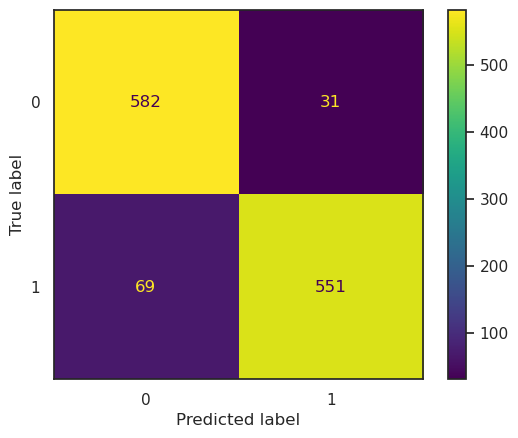

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

sns.set_style('white')
ConfusionMatrixDisplay.from_predictions(y_test, gbc.predict(X_test));


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       613
           1       0.95      0.89      0.92       620

    accuracy                           0.92      1233
   macro avg       0.92      0.92      0.92      1233
weighted avg       0.92      0.92      0.92      1233



# <div style="padding: 10px; color: #ffffff; margin: 2px; text-align: left; border-radius: 10px; background-color:#0e7071; overflow: hidden;">&#10145; Summary</div>

<div class="alert alert-block alert-info" style="color: #000000;">Out of 8 Sklearn classification models I picked, CrossValidation marked GradientBoostingClassifier as the best. After hyper-parameter tuning, the model scores over 90% in precision, recall, f1 and accuracy on testing data.</div>

<div class="alert alert-block alert-info" style="color: #000000;"><u>Some thoughts on the topic:</u><BR>
    In general, younger and less experienced employees tend to leave the company more than those working for longer time. From the analysis we see that these employees also have lower salaries, receive less trainings and don't own any stock options. So on one hand, the firm doesn't want to invest in new employees, as they see they are more likely to leave, but on the other hand it looks like this lack of investment in new employee is the reason they leave. A complicated topic :) My proposition would be to at least give new employees many training/certification options or free access to training platform and a lowest-level stock option after 3-6 months of working. I think these benefits could motivate and an inexperienced and underpaid employee and stop them from leaving, if they are considering it.</div>

<div class="alert alert-block alert-warning" style="color: #000000;">🎉 I made a web application based on this dataset and this problem. 🎉<BR>
    You can find it ✨<a href="http://exit-alert.eu-central-1.elasticbeanstalk.com/">here</a>✨ and the code can be found on ✨<a href="https://github.com/kattat13">my github</a>✨.</div>